In [1]:
# Import required libraries for data analysis and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Configure display settings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 100)

# Set visualization style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 6)
plt.rcParams['font.size'] = 11

print("Libraries imported successfully")

Libraries imported successfully


In [2]:
# Load both datasets from the uploads directory
# Dataset 1: Reddit mental health posts
# Dataset 2: Twitter mental health posts

df_reddit = pd.read_csv(r'/Users/rithika/mental_health_project/data/Mental_Health_Reddit.csv')
df_twitter = pd.read_csv(r'/Users/rithika/mental_health_project/data/Mental-Health-Twitter.csv')

print(f"Reddit Dataset Shape: {df_reddit.shape}")
print(f"Twitter Dataset Shape: {df_twitter.shape}")
print(f"\nTotal samples available: {len(df_reddit) + len(df_twitter):,}")

Reddit Dataset Shape: (27977, 2)
Twitter Dataset Shape: (20000, 11)

Total samples available: 47,977


## Examine Reddit Dataset Structure

In [3]:
# Display basic information about the Reddit dataset
print("=" * 80)
print("REDDIT DATASET OVERVIEW")
print("=" * 80)

# Show first few rows
print("\nFirst 5 rows:")
display(df_reddit.head())

# Show column information
print("\nColumn Information:")
print(df_reddit.info())

# Check for missing values
print("\nMissing Values:")
print(df_reddit.isnull().sum())

# Display basic statistics
print("\nBasic Statistics:")
print(df_reddit.describe())

REDDIT DATASET OVERVIEW

First 5 rows:


,text,label
0,dear american teens question dutch person heard guys get way easier things learn age us sooooo t...,0
1,nothing look forward lifei dont many reasons keep going feel like nothing keeps going next day m...,1
2,music recommendations im looking expand playlist usual genres alt pop minnesota hip hop steampun...,0
3,im done trying feel betterthe reason im still alive know mum devastated ever killed myself ever ...,1
4,worried year old girl subject domestic physicalmental housewithout going lot know girl know gir...,1



Column Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27977 entries, 0 to 27976
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    27977 non-null  object
 1   label   27977 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 437.3+ KB
None

Missing Values:
text     0
label    0
dtype: int64

Basic Statistics:
              label
count  27977.000000
mean       0.494621
std        0.499980
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000


## Examine Twitter Dataset Structure

In [4]:
# Display basic information about the Twitter dataset
print("=" * 80)
print("TWITTER DATASET OVERVIEW")
print("=" * 80)

# Show first few rows
print("\nFirst 5 rows:")
display(df_twitter.head())

# Show column information
print("\nColumn Information:")
print(df_twitter.info())

# Check for missing values
print("\nMissing Values:")
print(df_twitter.isnull().sum())

# Display basic statistics
print("\nBasic Statistics:")
print(df_twitter.describe())

TWITTER DATASET OVERVIEW

First 5 rows:


,Unnamed: 0,post_id,post_created,post_text,user_id,followers,friends,favourites,statuses,retweets,label
0,0,637894677824413696,Sun Aug 30 07:48:37 +0000 2015,It's just over 2 years since I was diagnosed with #anxiety and #depression. Today I'm taking a m...,1013187241,84,211,251,837,0,1
1,1,637890384576778240,Sun Aug 30 07:31:33 +0000 2015,"It's Sunday, I need a break, so I'm planning to spend as little time as possible on the #A14...",1013187241,84,211,251,837,1,1
2,2,637749345908051968,Sat Aug 29 22:11:07 +0000 2015,Awake but tired. I need to sleep but my brain has other ideas...,1013187241,84,211,251,837,0,1
3,3,637696421077123073,Sat Aug 29 18:40:49 +0000 2015,RT @SewHQ: #Retro bears make perfect gifts and are great for beginners too! Get stitching with O...,1013187241,84,211,251,837,2,1
4,4,637696327485366272,Sat Aug 29 18:40:26 +0000 2015,It’s hard to say whether packing lists are making life easier or just reinforcing how much still...,1013187241,84,211,251,837,1,1



Column Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    20000 non-null  int64 
 1   post_id       20000 non-null  int64 
 2   post_created  20000 non-null  object
 3   post_text     20000 non-null  object
 4   user_id       20000 non-null  int64 
 5   followers     20000 non-null  int64 
 6   friends       20000 non-null  int64 
 7   favourites    20000 non-null  int64 
 8   statuses      20000 non-null  int64 
 9   retweets      20000 non-null  int64 
 10  label         20000 non-null  int64 
dtypes: int64(9), object(2)
memory usage: 1.7+ MB
None

Missing Values:
Unnamed: 0      0
post_id         0
post_created    0
post_text       0
user_id         0
followers       0
friends         0
favourites      0
statuses        0
retweets        0
label           0
dtype: int64

Basic Statistics:
         Unnamed: 0   

## Analyze Label Distribution - **Reddit**

In [5]:
# Analyze the distribution of labels in the Reddit dataset
# Label interpretation: 0 = No mental health issue, 1 = Mental health issue detected

label_counts_reddit = df_reddit['label'].value_counts().sort_index()
label_percentages_reddit = df_reddit['label'].value_counts(normalize=True).sort_index() * 100

print("Reddit Dataset - Label Distribution:")
print("-" * 50)
for label, count in label_counts_reddit.items():
    percentage = label_percentages_reddit[label]
    print(f"Label {label}: {count:,} samples ({percentage:.2f}%)")

# Calculate class imbalance ratio
imbalance_ratio_reddit = label_counts_reddit.max() / label_counts_reddit.min()
print(f"\nClass Imbalance Ratio: {imbalance_ratio_reddit:.2f}:1")

Reddit Dataset - Label Distribution:
--------------------------------------------------
Label 0: 14,139 samples (50.54%)
Label 1: 13,838 samples (49.46%)

Class Imbalance Ratio: 1.02:1


## Analyze Label Distribution - **Twitter**

In [6]:
# Analyze the distribution of labels in the Twitter dataset
# Label interpretation: 0 = No mental health issue, 1 = Mental health issue detected

label_counts_twitter = df_twitter['label'].value_counts().sort_index()
label_percentages_twitter = df_twitter['label'].value_counts(normalize=True).sort_index() * 100

print("Twitter Dataset - Label Distribution:")
print("-" * 50)
for label, count in label_counts_twitter.items():
    percentage = label_percentages_twitter[label]
    print(f"Label {label}: {count:,} samples ({percentage:.2f}%)")

# Calculate class imbalance ratio
imbalance_ratio_twitter = label_counts_twitter.max() / label_counts_twitter.min()
print(f"\nClass Imbalance Ratio: {imbalance_ratio_twitter:.2f}:1")

Twitter Dataset - Label Distribution:
--------------------------------------------------
Label 0: 10,000 samples (50.00%)
Label 1: 10,000 samples (50.00%)

Class Imbalance Ratio: 1.00:1


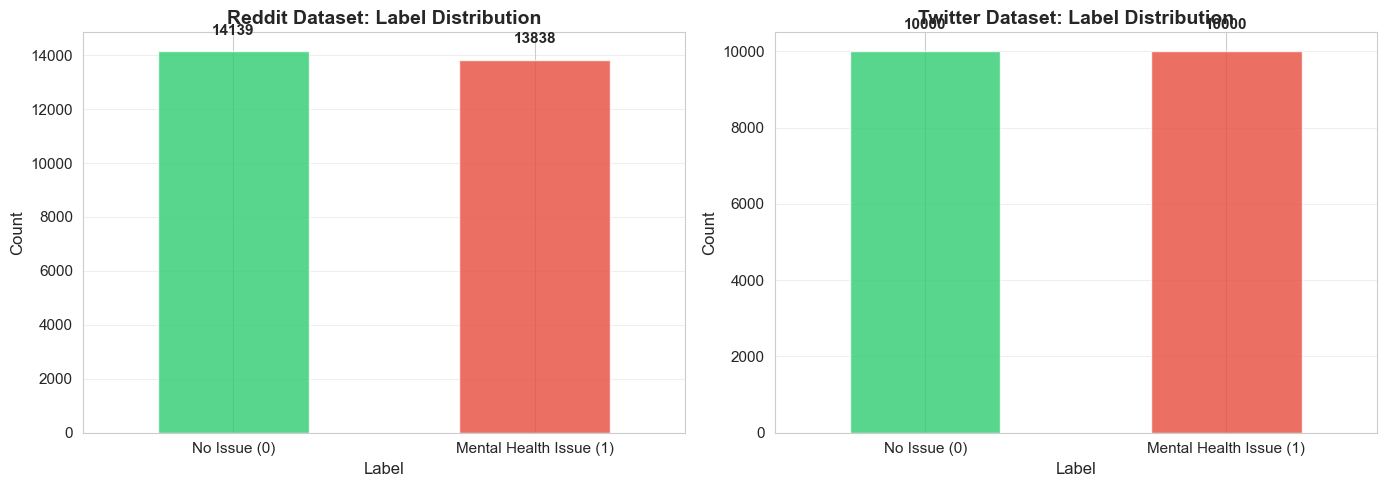

In [7]:
# Create visualizations for label distribution in both datasets

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Reddit dataset label distribution
label_counts_reddit.plot(kind='bar', ax=axes[0], color=['#2ecc71', '#e74c3c'], alpha=0.8)
axes[0].set_title('Reddit Dataset: Label Distribution', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Label', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)
axes[0].set_xticklabels(['No Issue (0)', 'Mental Health Issue (1)'], rotation=0)
axes[0].grid(axis='y', alpha=0.3)

# Add count labels on bars
for i, v in enumerate(label_counts_reddit):
    axes[0].text(i, v + 500, str(v), ha='center', va='bottom', fontweight='bold')

# Twitter dataset label distribution
label_counts_twitter.plot(kind='bar', ax=axes[1], color=['#2ecc71', '#e74c3c'], alpha=0.8)
axes[1].set_title('Twitter Dataset: Label Distribution', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Label', fontsize=12)
axes[1].set_ylabel('Count', fontsize=12)
axes[1].set_xticklabels(['No Issue (0)', 'Mental Health Issue (1)'], rotation=0)
axes[1].grid(axis='y', alpha=0.3)

# Add count labels on bars
for i, v in enumerate(label_counts_twitter):
    axes[1].text(i, v + 500, str(v), ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

## Analyze Text Length - **Reddit**

In [8]:
# Calculate and analyze text length statistics for the Reddit dataset

df_reddit['text_length'] = df_reddit['text'].str.len()
df_reddit['word_count'] = df_reddit['text'].str.split().str.len()

print("Reddit Dataset - Text Length Analysis:")
print("-" * 50)
print("\nCharacter Length Statistics:")
print(df_reddit['text_length'].describe())

print("\nWord Count Statistics:")
print(df_reddit['word_count'].describe())

# Compare text length between classes
print("\nText Length by Label:")
print(df_reddit.groupby('label')['text_length'].describe())

Reddit Dataset - Text Length Analysis:
--------------------------------------------------

Character Length Statistics:
count    27977.000000
mean       464.576259
std        699.067114
min          2.000000
25%         99.000000
50%        237.000000
75%        559.000000
max      25289.000000
Name: text_length, dtype: float64

Word Count Statistics:
count    27977.000000
mean        71.759410
std        103.802417
min          0.000000
25%         16.000000
50%         38.000000
75%         87.000000
max       2676.000000
Name: word_count, dtype: float64

Text Length by Label:
         count        mean         std  min    25%    50%     75%      max
label                                                                     
0      14139.0  315.154608  494.252282  2.0   71.0  134.0  354.50   9411.0
1      13838.0  617.248085  832.064823  4.0  184.0  378.0  752.75  25289.0


## Analyze Text Length - **Twitter**

In [9]:
# Calculate and analyze text length statistics for the Twitter dataset

df_twitter['text_length'] = df_twitter['post_text'].str.len()
df_twitter['word_count'] = df_twitter['post_text'].str.split().str.len()

print("Twitter Dataset - Text Length Analysis:")
print("-" * 50)
print("\nCharacter Length Statistics:")
print(df_twitter['text_length'].describe())

print("\nWord Count Statistics:")
print(df_twitter['word_count'].describe())

# Compare text length between classes
print("\nText Length by Label:")
print(df_twitter.groupby('label')['text_length'].describe())

Twitter Dataset - Text Length Analysis:
--------------------------------------------------

Character Length Statistics:
count    20000.000000
mean        82.462950
std         38.281974
min          4.000000
25%         50.000000
50%         77.000000
75%        118.000000
max        169.000000
Name: text_length, dtype: float64

Word Count Statistics:
count    20000.000000
mean        12.521550
std          6.858767
min          1.000000
25%          7.000000
50%         12.000000
75%         18.000000
max         34.000000
Name: word_count, dtype: float64

Text Length by Label:
         count     mean        std  min   25%   50%    75%    max
label                                                            
0      10000.0  81.9331  39.717897  5.0  46.0  74.0  122.0  169.0
1      10000.0  82.9928  36.784408  4.0  53.0  80.0  115.0  152.0


## Visualize Text Length Distribution

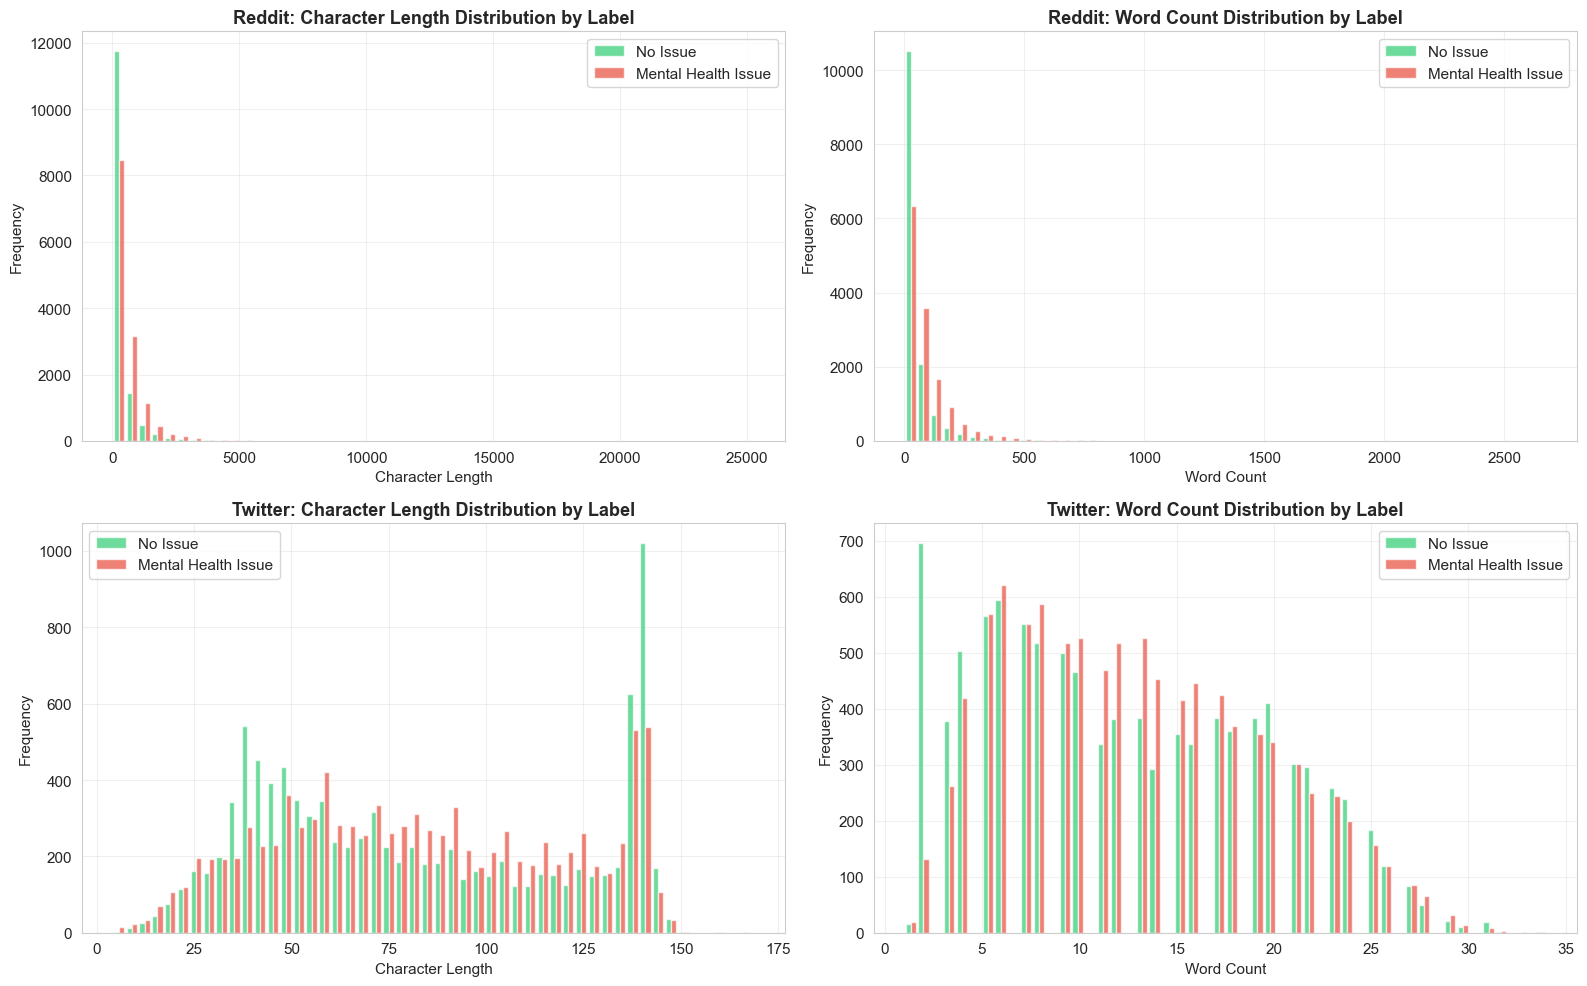

In [10]:
# Create visualizations comparing text length distributions between classes

fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Reddit - Character length distribution
axes[0, 0].hist([df_reddit[df_reddit['label']==0]['text_length'], 
                  df_reddit[df_reddit['label']==1]['text_length']], 
                 label=['No Issue', 'Mental Health Issue'],
                 bins=50, color=['#2ecc71', '#e74c3c'], alpha=0.7)
axes[0, 0].set_title('Reddit: Character Length Distribution by Label', fontsize=13, fontweight='bold')
axes[0, 0].set_xlabel('Character Length')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].legend()
axes[0, 0].grid(alpha=0.3)

# Reddit - Word count distribution
axes[0, 1].hist([df_reddit[df_reddit['label']==0]['word_count'], 
                  df_reddit[df_reddit['label']==1]['word_count']], 
                 label=['No Issue', 'Mental Health Issue'],
                 bins=50, color=['#2ecc71', '#e74c3c'], alpha=0.7)
axes[0, 1].set_title('Reddit: Word Count Distribution by Label', fontsize=13, fontweight='bold')
axes[0, 1].set_xlabel('Word Count')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].legend()
axes[0, 1].grid(alpha=0.3)

# Twitter - Character length distribution
axes[1, 0].hist([df_twitter[df_twitter['label']==0]['text_length'], 
                  df_twitter[df_twitter['label']==1]['text_length']], 
                 label=['No Issue', 'Mental Health Issue'],
                 bins=50, color=['#2ecc71', '#e74c3c'], alpha=0.7)
axes[1, 0].set_title('Twitter: Character Length Distribution by Label', fontsize=13, fontweight='bold')
axes[1, 0].set_xlabel('Character Length')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].legend()
axes[1, 0].grid(alpha=0.3)

# Twitter - Word count distribution
axes[1, 1].hist([df_twitter[df_twitter['label']==0]['word_count'], 
                  df_twitter[df_twitter['label']==1]['word_count']], 
                 label=['No Issue', 'Mental Health Issue'],
                 bins=50, color=['#2ecc71', '#e74c3c'], alpha=0.7)
axes[1, 1].set_title('Twitter: Word Count Distribution by Label', fontsize=13, fontweight='bold')
axes[1, 1].set_xlabel('Word Count')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].legend()
axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

## Display Sample Texts - **Reddit (Label 1)**

In [11]:
# Display sample texts from Reddit dataset with mental health issues (Label 1)

print("=" * 80)
print("REDDIT DATASET - SAMPLE TEXTS WITH MENTAL HEALTH ISSUES (Label 1)")
print("=" * 80)

sample_texts = df_reddit[df_reddit['label']==1]['text'].head(5)

for idx, text in enumerate(sample_texts, 1):
    print(f"\nSample {idx}:")
    print("-" * 80)
    # Display first 500 characters for readability
    display_text = text[:500] + "..." if len(text) > 500 else text
    print(display_text)

REDDIT DATASET - SAMPLE TEXTS WITH MENTAL HEALTH ISSUES (Label 1)

Sample 1:
--------------------------------------------------------------------------------
nothing look forward lifei dont many reasons keep going feel like nothing keeps going next day makes want hang myself

Sample 2:
--------------------------------------------------------------------------------
im done trying feel betterthe reason im still alive know mum devastated ever killed myself ever passes im still state im going hesitate ending life shortly after im almost  take meds go therapy nothing seems help enough dont want around anymore hate feeling like this wouldnt wish upon enemy brain feels like constantly like static tv wont shut overthinking do think im running options dont see living past  got accepted health science degree dont even know wanna try know im smart mental illness hol...

Sample 3:
--------------------------------------------------------------------------------
worried  year old girl subject domes

## Display Sample Texts - **Reddit (Label 0)**

In [13]:
# Display sample texts from Reddit dataset without mental health issues (Label 0)

print("=" * 80)
print("REDDIT DATASET - SAMPLE TEXTS WITHOUT MENTAL HEALTH ISSUES (Label 0)")
print("=" * 80)

sample_texts = df_reddit[df_reddit['label']==0]['text'].head(5)

for idx, text in enumerate(sample_texts, 1):
    print(f"\nSample {idx}:")
    print("-" * 80)
    # Display first 500 characters for readability
    display_text = text[:500] + "..." if len(text) > 500 else text
    print(display_text)

REDDIT DATASET - SAMPLE TEXTS WITHOUT MENTAL HEALTH ISSUES (Label 0)

Sample 1:
--------------------------------------------------------------------------------
dear american teens question dutch person heard guys get way easier things learn age us sooooo thth graders like  right guys learn math

Sample 2:
--------------------------------------------------------------------------------
music recommendations im looking expand playlist usual genres alt pop minnesota hip hop steampunk various indie genres artists people like cavetown aliceband bug hunter penelope scott various rhymesayers willing explore new genresartists such anything generic rap the type exclusively sex drugs cool rapper is rap types pretty good pop popular couple years ago dunno technical genre name anyways anyone got music recommendations favorite artistssongs

Sample 3:
--------------------------------------------------------------------------------
feel like someone needs hear tonight feeling right think cant anythi

## Display Sample Texts - **Twitter (Label 1)**

In [14]:
# Display sample texts from Twitter dataset with mental health issues (Label 1)

print("=" * 80)
print("TWITTER DATASET - SAMPLE TEXTS WITH MENTAL HEALTH ISSUES (Label 1)")
print("=" * 80)

sample_texts = df_twitter[df_twitter['label']==1]['post_text'].head(5)

for idx, text in enumerate(sample_texts, 1):
    print(f"\nSample {idx}:")
    print("-" * 80)
    # Display first 500 characters for readability
    display_text = text[:500] + "..." if len(text) > 500 else text
    print(display_text)

TWITTER DATASET - SAMPLE TEXTS WITH MENTAL HEALTH ISSUES (Label 1)

Sample 1:
--------------------------------------------------------------------------------
It's just over 2 years since I was diagnosed with #anxiety and #depression. Today I'm taking a moment to reflect on how far I've come since.

Sample 2:
--------------------------------------------------------------------------------
It's Sunday, I need a break, so I'm planning to spend as little time as possible on the #A14...

Sample 3:
--------------------------------------------------------------------------------
Awake but tired. I need to sleep but my brain has other ideas...

Sample 4:
--------------------------------------------------------------------------------
RT @SewHQ: #Retro bears make perfect gifts and are great for beginners too! Get stitching with October's Sew on sale NOW! #yay http://t.co/…

Sample 5:
--------------------------------------------------------------------------------
It’s hard to say whether packi

## Display Sample Texts - **Twitter (Label 0)**

In [15]:
# Display sample texts from Twitter dataset without mental health issues (Label 0)

print("=" * 80)
print("TWITTER DATASET - SAMPLE TEXTS WITHOUT MENTAL HEALTH ISSUES (Label 0)")
print("=" * 80)

sample_texts = df_twitter[df_twitter['label']==0]['post_text'].head(5)

for idx, text in enumerate(sample_texts, 1):
    print(f"\nSample {idx}:")
    print("-" * 80)
    # Display first 500 characters for readability
    display_text = text[:500] + "..." if len(text) > 500 else text
    print(display_text)

TWITTER DATASET - SAMPLE TEXTS WITHOUT MENTAL HEALTH ISSUES (Label 0)

Sample 1:
--------------------------------------------------------------------------------
MY ENEMY'S INVISIBLE , I DON'T KNOW HOW TO FIGHT

Sample 2:
--------------------------------------------------------------------------------
im gonna burn my house down into an ugly brack

Sample 3:
--------------------------------------------------------------------------------
@HOT_cocoa_____ counterattack

Sample 4:
--------------------------------------------------------------------------------
@noob_aspe810 golden.ta-chi

Sample 5:
--------------------------------------------------------------------------------
lol or spl or drow


## Summary Statistics

In [16]:
# Generate comprehensive summary of both datasets

print("=" * 80)
print("COMPREHENSIVE DATA SUMMARY")
print("=" * 80)

summary_data = {
    'Metric': [
        'Total Samples',
        'Label 0 Count',
        'Label 1 Count',
        'Class Imbalance Ratio',
        'Avg Character Length',
        'Avg Word Count',
        'Min Character Length',
        'Max Character Length'
    ],
    'Reddit Dataset': [
        len(df_reddit),
        label_counts_reddit[0],
        label_counts_reddit[1],
        f"{imbalance_ratio_reddit:.2f}:1",
        f"{df_reddit['text_length'].mean():.0f}",
        f"{df_reddit['word_count'].mean():.0f}",
        df_reddit['text_length'].min(),
        df_reddit['text_length'].max()
    ],
    'Twitter Dataset': [
        len(df_twitter),
        label_counts_twitter[0],
        label_counts_twitter[1],
        f"{imbalance_ratio_twitter:.2f}:1",
        f"{df_twitter['text_length'].mean():.0f}",
        f"{df_twitter['word_count'].mean():.0f}",
        df_twitter['text_length'].min(),
        df_twitter['text_length'].max()
    ]
}

summary_df = pd.DataFrame(summary_data)
display(summary_df)

COMPREHENSIVE DATA SUMMARY


,Metric,Reddit Dataset,Twitter Dataset
0,Total Samples,27977,20000
1,Label 0 Count,14139,10000
2,Label 1 Count,13838,10000
3,Class Imbalance Ratio,1.02:1,1.00:1
4,Avg Character Length,465,82
5,Avg Word Count,72,13
6,Min Character Length,2,4
7,Max Character Length,25289,169
